# Template Pipeline
Normalisation&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**X -> Gaussian**  
Imputation 1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**Median**  
Outlier Detection&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**Z Score**  
Imputation 2&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**Median**  
Feature Selection&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**Implicit to model**  
Model&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**Lasso Regression**


## Imports

In [7]:
# General
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ML
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, BayesianRidge
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

# Custom
import sys,os
sys.path.append('/home/jovyan/work/AML/Task_1/Solution') # I would like a cleaner solution but works for now
import Components.Imputation as Imputation
import Components.Outlier_Detection_1D as Outlier_Detection_1D
import Components.Outlier_Detection_ND as Outlier_Detection_ND
import Components.Feature_Selection as Feature_Selection
import Components.Normalisation as Normalisation
import Components.data_fetching as data_fetching
import Components.data_observations as data_observations

# CAREFUL:
# If you make changes to a custom module, you have to reload it, i.e rerun this cell
import importlib
importlib.reload(Imputation)
importlib.reload(Outlier_Detection_1D)
importlib.reload(Outlier_Detection_ND)
importlib.reload(Feature_Selection)
importlib.reload(Normalisation)
importlib.reload(data_fetching)
importlib.reload(data_observations)

<module 'Components.data_observations' from '/home/jovyan/work/AML/Task_1/Solution/Components/data_observations.py'>

## Data Cleaning

In [8]:
X, y = data_fetching.get_train_data()

missing_vals_mask = Imputation.missing_values_mask(X)
X = Imputation.median(X)
X = Normalisation.gaussian(X)
X = Outlier_Detection_1D.z_score(X)
X = X.mask(missing_vals_mask) # Re-impute the ones we imputed before
X = Imputation.mean(X)
X,y = Outlier_Detection_ND.mahalanobis_distance(X,y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

## Model Training

### Simple

In [10]:
# lasso = Lasso(normalize=False, max_iter=1000, alpha=0.4).fit(x_train, y_train)
lasso = LassoCV(cv=5, random_state=0).fit(x_train, y_train)

print('Train Score:')
y_pred_train = lasso.predict(x_train)
train_score = r2_score(y_train, y_pred_train)
print(train_score)

print('Test Score')
y_pred_test = lasso.predict(x_test)
test_score = r2_score(y_test, y_pred_test)
print(test_score)

/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.15023939990897, tolerance: 8.009387332521312
  positive)
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.3275164042534, tolerance: 8.009387332521312
  positive)
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50.4419875905769, tolerance: 8.

/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59.21255417897555, tolerance: 8.009387332521312
  positive)
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87.88830086437702, tolerance: 8.009387332521312
  positive)
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68.64962747483514, tolerance: 8.009387332521312
  positive)
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53.1306667418375

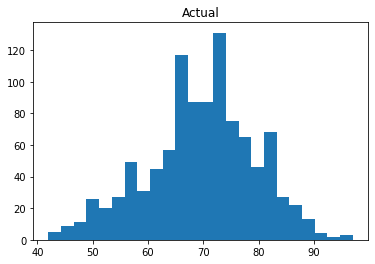

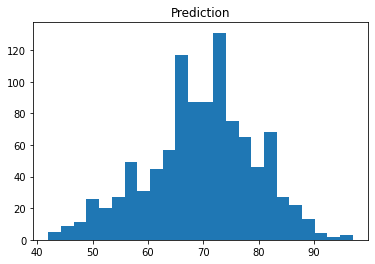

In [11]:
plt.hist(y_train.iloc[:,0].to_numpy(), bins='auto')
plt.title('Actual')
plt.show()

plt.hist(y_pred_train, bins='auto')
plt.title('Prediction')
plt.show()

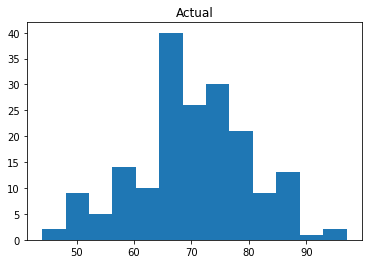

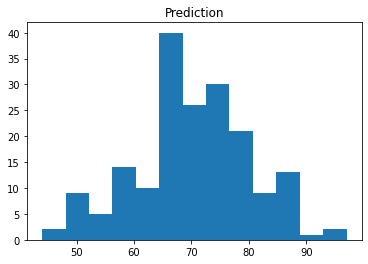

In [12]:
plt.hist(y_test.iloc[:,0].to_numpy(), bins='auto')
plt.title('Actual')
plt.show()

plt.hist(y_pred_test, bins='auto')
plt.title('Prediction')
plt.show()

## Final Prediction

In [6]:
lasso_final = LassoCV(cv=5, random_state=0).fit(X, y)
x_test = data_fetching.get_test_data()

print(X.shape)
print(x_test.shape)

print(X.head())
print(x_test.head())

# x_test = Imputation.mean(x_test)
# # Note: They said no outliers were introduced in x_test so no need to perform outlier detection
# y_pred = lasso_final.predict(x_test)
# plt.hist(y_pred)

# y_pred_pd = pd.DataFrame(data=y_pred, columns=["y"])
# y_pred_pd.to_csv('../../Predictions/too_good_to_be_true.csv', index_label='Id')

/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
(1209, 833)
(776, 832)
          0         1         2         3         4         5         6  \
0  0.985497 -1.779499  0.569100 -0.648897  1.715416 -0.972251  1.968190   
1  1.582564  1.321694 -0.010693 -1.158888  0.392737  0.866811  0.900300   
2  1.166622  1.212859 -0.409335 -1.818220 -0.861723 -0.957059 -0.181168   
3  1.734518 -0.006004 -0.010693 -1.684720 -0.643748 -0.635144  0.643726   
4  0.462699 -0.869882  0.950762 -0.009168 -0.147749 -1.712462 -0.255731   

          7         8         9  ...       823       824       825       826  \
0 -0.005068  1.510975 -0.731503  ...  0.222310 -0.669060  0.370455  0.928293   
1 -1.592517  1.053868  0.986630  ...  0.660993 -1.420039  0.193380 -0.667874   
2  0.372202  0.388053 -0.149745  ... -0